<a href="https://colab.research.google.com/github/Akshad135/first-RNNs/blob/main/Semamtic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Embedding, Dense, SimpleRNN, LSTM, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [70]:
(X_train, y_train),(X_test, y_test) = imdb.load_data()

In [71]:
X_train.shape

(25000,)

In [72]:
from keras.utils import pad_sequences

In [73]:
maxlen = 250
X_train = pad_sequences(X_train, maxlen=maxlen, padding='post')
X_test = pad_sequences(X_test, maxlen=maxlen, padding='post')

In [74]:
vocab_size = max(max(seq) for seq in X_train) + 1
print("Vocabulary size:", vocab_size)

Vocabulary size: 88587


In [75]:
X_train.shape

(25000, 250)

In [76]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [77]:
checkpoint = ModelCheckpoint(
    "best_model.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

In [78]:
model = Sequential()
model.add(Embedding(vocab_size,32))
# model.add(SimpleRNN(32,return_sequences=False))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.build(input_shape=(None, maxlen))
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 250, 32)             │       2,834,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 250, 32)             │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,851,457 (10.88 MB)

 Trainable params: 2,851,457 (10.88 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [81]:
h1 = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5073 - loss: 0.6930
Epoch 1: val_accuracy improved from -inf to 0.51292, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.5073 - loss: 0.6930 - val_accuracy: 0.5129 - val_loss: 0.6929
Epoch 2/10
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5269 - loss: 0.6888
Epoch 2: val_accuracy improved from 0.51292 to 0.59708, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.5270 - loss: 0.6888 - val_accuracy: 0.5971 - val_loss: 0.6854
Epoch 3/10
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7240 - loss: 0.5947
Epoch 3: val_accuracy improved from 0.59708 to 0.69344, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.7239 - loss: 0.5948 - val_accuracy: 0.6934 - val_loss: 0.5929
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7295 - loss: 0.6316
Epoch 4: val_accuracy improved 

In [82]:
best_model = load_model("best_model.keras")

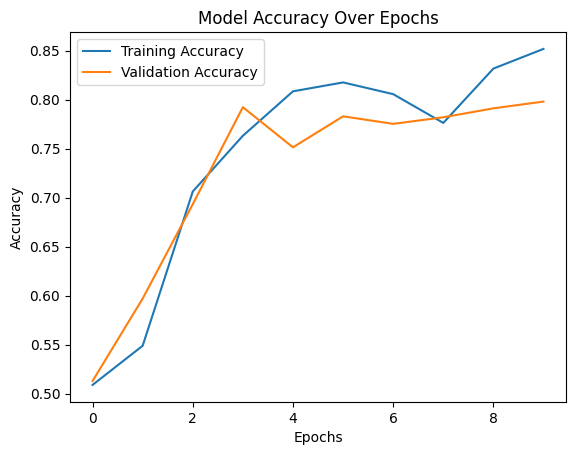

In [83]:
import matplotlib.pyplot as plt

plt.plot(h1.history['accuracy'], label='Training Accuracy')
plt.plot(h1.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()

In [84]:
from sklearn.metrics import accuracy_score

y_pred = best_model.predict(X_test)
y_pred_labels = (y_pred >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_labels)
print("Sklearn Accuracy:", accuracy)


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
Sklearn Accuracy: 0.79812
